<a href="https://colab.research.google.com/github/urfa10/MSIB_Data-Science/blob/main/MSIB_StudiCase_CreditRisk_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Understanding
Salah satu bank terkemuka ingin memprediksi nasabah yang terindikasi kredit macet saat mengajukan pinjaman. Pemberi pinjaman biasanya membuat dua jenis keputusan:
1. pertama, apakah akan memberikan kredit kepada pemohon baru, dan
2. kedua, bagaimana menangani pemohon yang sudah ada, termasuk apakah akan meningkatkan batas kredit mereka.

<br> Dalam kedua kasus, apa pun teknik yang digunakan, sangat penting bahwa ada sampel besar pelanggan sebelumnya dengan detail aplikasi, pola perilaku, dan riwayat kredit berikutnya yang tersedia. Sebagian besar teknik menggunakan sampel ini untuk mengidentifikasi hubungan antara karakteristik konsumen (pendapatan tahunan, usia, jumlah tahun bekerja dengan pemberi kerja saat ini, dll.) Dan riwayat mereka selanjutnya. Area aplikasi khas di pasar konsumen meliputi: kartu kredit, pinjaman mobil, hipotek rumah, pinjaman ekuitas rumah, pesanan katalog surat, dan berbagai macam produk pinjaman pribadi.

Objectives:
1. Prediktive pengajuan nasabah kartu kredit yang baru akan gagal bayar atau tidak
## Prediktif Analytic untuk menininalisir agka resiko Nasabah Baru yang
Berpotensi Gagal Bayar pada Pengajuan Kartu Kredit menggunakan pendekatan
sains data

Case : Klasifikasi —> Supervised Learning

Kenungkinan Algoritma yang akan dipergunakan:

1. Decisiontree I

2. RandonForrest

3. Logistic Regression

4. SUM (Support Vector Machine)

5. XGBOOST classifier

Objective 2: Prediktive Kenaikan angka kredit pada nasabah yg sudah ada
##Implenentasi nesin learning untuk Prediktive sebagai langkah optimalisasi
nilai kredit pada OLD Nasabah bank XX.

Case : Estinasi
Kenungkinan Algoritma yang dipergunakar
1. Liner Regression
2. AN (Artificial Neural Netvord
Prediktif Analytic untuk meminimalisir agka resiko Nasabah
Baru yang Berpotensi Gagal Bayar pada Pengajuan Kartu Kredit
menggunakan pendekatan sains data

Case: Kiasifikasi -> Supervised Learning
Kemungkinan Algoritma yang akan dipergunakan:
Decisiontree
RandomForrest
Logistic Regression
SVM (Support Vector Machine)
XGBOOST classifier
EAPO
Objective 2: Prediktive Kenaikan angka kredit pada nasabah yg sudah ada
Implementasi mesin learning untuk Prediktive sebagai langkah
optimalisasi nilai kredit pada OLD Nasabah bank XX.
[R—
Kemungkinan Algoritma yang dipergunakan:
1. Linier Regression

In [ ]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Data Understanding

In [ ]:
#import data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/DataSource/credit_risk_1.csv'
load_data_cr = pd.read_csv(path)
load_data_cr

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...,...
695,695,36,2,6,15,27,4.6,0.262062,0.979938,1.0
696,696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,698,45,1,19,22,77,8.4,2.302608,4.165392,0.0


In [ ]:
#membuat data frame, data frame memungkinkan source kita tidak mondar mandir dari colab ke drive sehingga lebih ringan
df = pd.DataFrame(load_data_cr)
df.head()

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


Data Description There are 9 attributes containing 700 customer records followed by:

age: Umur nasabah

ed : Level pendidikan nasabah

employ : Masa jabatan dengan pemberi kerja saat ini (dalam tahun)

address : Jumlah tahun di alamat yang sama

income : Pendapatan nasabah

debtinc : Debt to income ratio (Rasio hutang terhadap pendapatan) Rasio hutang terhadap pendapatan adalah semua pembayaran hutang bulanan Anda dibagi dengan pendapatan kotor bulanan Anda. Angka ini adalah salah satu cara pemberi pinjaman mengukur kemampuan Anda untuk mengelola pembayaran bulanan untuk melunasi uang yang Anda rencanakan untuk dipinjam. Rasio hutang terhadap pendapatan Anda tidak secara langsung mempengaruhi nilai kredit Anda. Ini karena lembaga kredit tidak tahu berapa banyak uang yang Anda peroleh, sehingga mereka tidak dapat melakukan penghitungan

creddebt : Credit to debt ratio (Rasio kredit terhadap utang) Menunjukkan bahwa persentase rasio hutang terhadap kredit yang baik di bawah 30%. Dan itu berlaku untuk rasio Anda pada salah satu kartu Anda secara terpisah serta untuk rasio keseluruhan Anda.

othdebt : utang lainnya

default : Label pelanggan gagal di masa lalu (1 = gagal , 0 = tidak pernah gagal)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  700 non-null    int64  
 1   age         700 non-null    int64  
 2   ed          700 non-null    int64  
 3   employ      700 non-null    int64  
 4   address     700 non-null    int64  
 5   income      700 non-null    int64  
 6   debtinc     700 non-null    float64
 7   creddebt    700 non-null    float64
 8   othdebt     700 non-null    float64
 9   default     700 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 54.8 KB


In [ ]:
#ngcek missing values
df.isnull().sum()

Unnamed: 0    0
age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default       0
dtype: int64

tipe data semuanya numeric, tapicase nya klassifikasi. sehingga nntipada tahap pemodelan data variabel dependen/variabel target harus diubah ke dlm bentukkategori
syarat klasifikasi
1. Variabel target --> kategorik
2. input variabelbisa kategorik/numerik

- variabel target pada kasus diatas = default
- variabel input =
1. age
2. ed
3. employ
4. address
5. income
6. debtinc
7. creddebt
8. othdebt

In [ ]:
#melakukan cek valuejumlah kredit berdasarkan gagal atau tidak (1 atau 0)
df['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

In [ ]:
#melakukan cek valuejumlah kredit berdasarkan gagal atau tidak (1 atau 0)
df['ed'].value_counts()

1    372
2    198
3     87
4     38
5      5
Name: ed, dtype: int64

In [ ]:
df_data_cr = pd.DataFrame(load_data_cr)

In [ ]:
#df = df_data_cr[['age', 'ed', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'default']]

In [ ]:
df_a = df[['age','ed','employ','address','income','debtinc','creddebt','othdebt']]


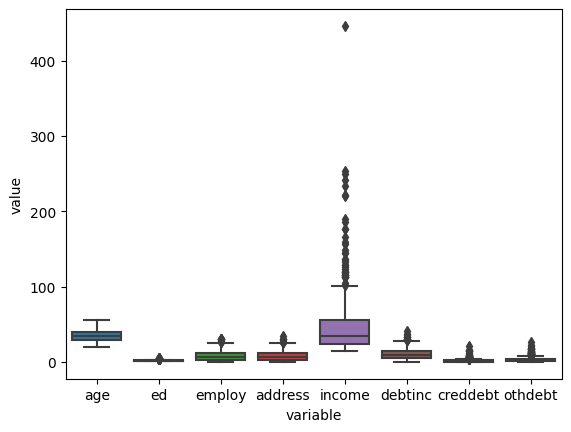

In [ ]:
#menganlisa kondisi data kita, melihat outlier pada data, boxplot
sns.boxplot(x='variable', y='value', data=pd.melt(df_a))
plt.show()

Variabel income  memiliki nilai yang cenderung tiggi karena income ituadalah uang

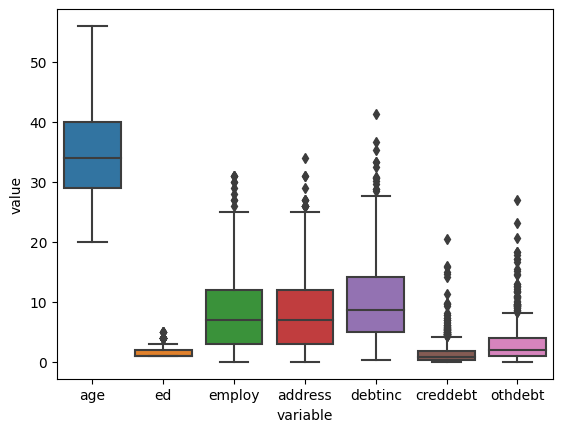

In [ ]:
df_b = df[['age','ed','employ','address','debtinc','creddebt','othdebt']]
sns.boxplot(x='variable', y='value', data=pd.melt(df_b))
plt.show()

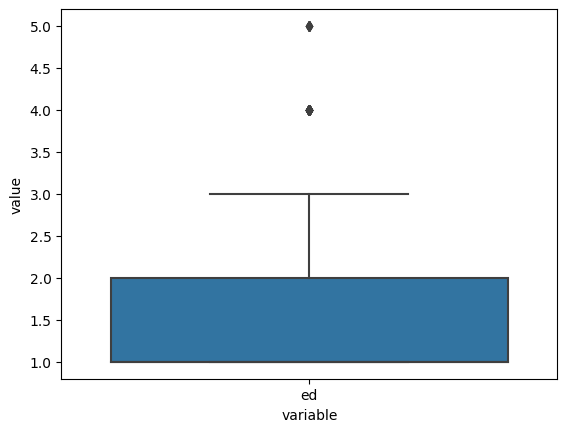

In [ ]:
df_c =df[['ed']]
sns.boxplot(x='variable', y='value', data=pd.melt(df_c))
plt.show()

1. Calon nasabah kredit di dominasi usia diatas 20

2. Tingkat pendidikan calon nasabah ada 5 yaitu SD/SMP/SMA/S1/52. Dimana tingkat pendidikan 1 dan 2 berada pada area boxplot
(sebarannya banyak), Sedangkan ED 3-> lebih sedlkit. Makin sedikit level pendidikan maka makin besar peluang pengajuan kreditnya

3. Orang mengajukan kredit jika mereka sudah diatas 2 tahun tinggal ditempat yg sama, jabatan yg same, rasio debiic dalam 2 tahun

(nilainya sama) .
4. Ada banyak calon nasabah kredit memiliki hutang lainnya.


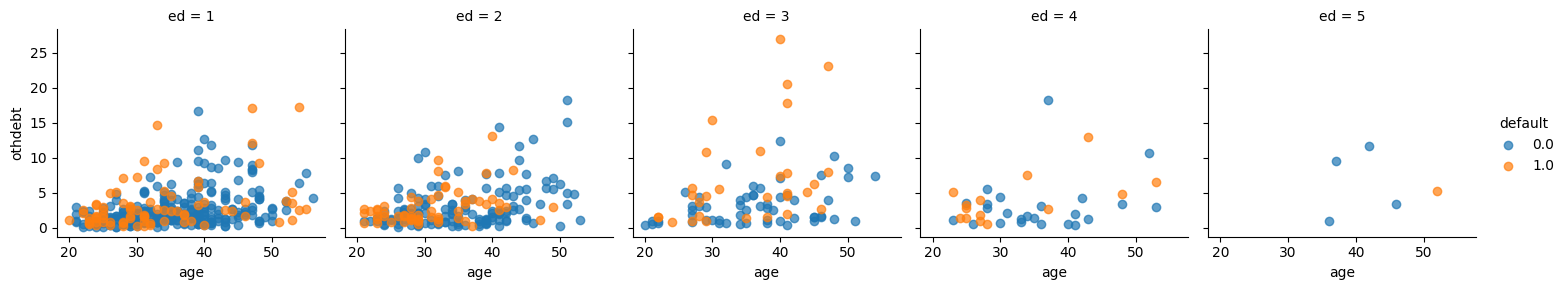

In [ ]:
scatplot = sns.FacetGrid(df_data_cr, col ='ed', hue = 'default')
scatplot.map(plt.scatter, 'age', 'othdebt', alpha =.7)
scatplot.add_legend()

1. Potensi gagal bayar didominasi pada range usia 20 sd 30 pada level ED 1
2. Potensi gagal bayar didominasi pada range usia 20 sd 35 pada level ED 2
3. Potensi gagal bayar didominasi pada range usia 20 sd 45 pada level ED 3
4. Potensi gagal bayar didominasi pada range usia 20 sd 28 pada level ED 4
5. Potensi gagal bayar didominasi pada range usia diatas 50 pada level ED 5


##Data Preparation
### NULL value NAN value

In [ ]:
df.isnull().sum()

Unnamed: 0    0
age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default       0
dtype: int64

In [ ]:
df.isna().sum()

Unnamed: 0    0
age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default       0
dtype: int64

## Pemodelan Data


In [ ]:
#split training and testing
from sklearn.model_selection import train_test_split # Import train_tes_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
#Evaluation Model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [ ]:
#input variabel
x=df_a[['age','ed','employ','address','income','debtinc','creddebt','othdebt']]
#target var
y=df['default'].astype('category')

In [ ]:
#Split testing & training (supervised learning)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
#penjelasan
#Data training = 70% dan testing 30%

## Pemodelan dengan Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#membuat object algoritma decision tree klasifikasi
tree= DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None)
#memodelkan data menggunakan algortima decision tree
model_tree=tree.fit(x_train, y_train)
#Melakukan prediksi pada data test
pred_Tree=model_tree.predict(x_test)

## Evaluasi Decision Tree Klasifikasi

In [ ]:
print(classification_report(y_test, pred_Tree))

              precision    recall  f1-score   support

         0.0       0.81      0.72      0.76       155
         1.0       0.40      0.53      0.46        55

    accuracy                           0.67       210
   macro avg       0.61      0.62      0.61       210
weighted avg       0.70      0.67      0.68       210



model diatas tidak bisa dipergunakan

Text(113.9222222222222, 0.5, 'predicted label')

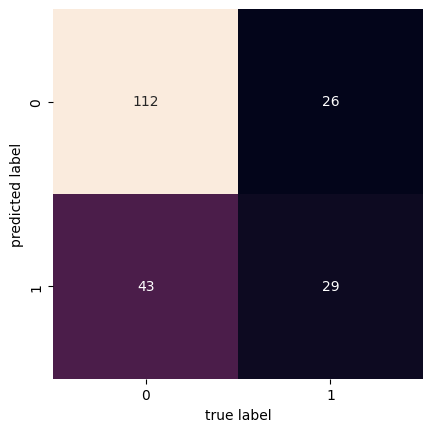

In [ ]:
# Visualize the confusion matrix of Decision Tree
mat = confusion_matrix (y_test, pred_Tree)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted label')

<Axes: >

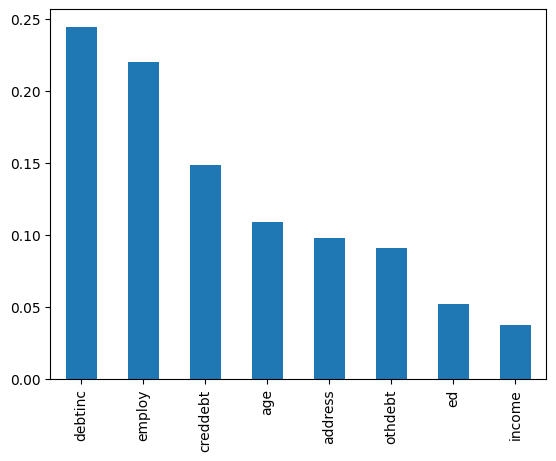

In [ ]:
#signifikan factor dari model tersebut yang menggambarkan nasabah gagal bayar/tidak
feat_importances = pd.Series(model_tree.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='bar')

##Pemodelan Menggunakan Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
#membuat object algoritma decision tree klasifikasi
clf_rf = RandomForestClassifier(n_estimators=200,max_depth=6)
#memodelkan data menggunakan algortima decision tree
model_rf=clf_rf.fit(x_train, y_train)
#Melakukan prediksi pada data test
pred_rf=model_rf.predict(x_test)

##Evaluasi model random forest

In [ ]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87       155
         1.0       0.73      0.35      0.47        55

    accuracy                           0.80       210
   macro avg       0.77      0.65      0.67       210
weighted avg       0.79      0.80      0.77       210



Text(113.9222222222222, 0.5, 'predicted label')

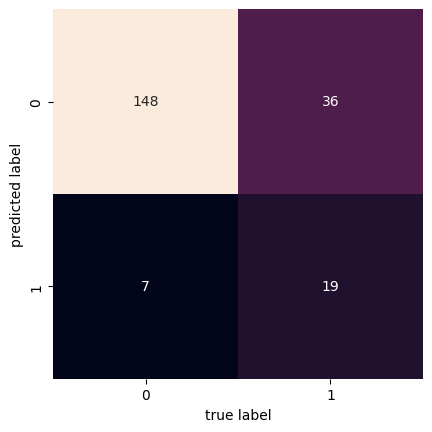

In [ ]:
# Visualize the confusion matrix of Random Forest
mat = confusion_matrix (y_test, pred_rf)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted label')

<Axes: >

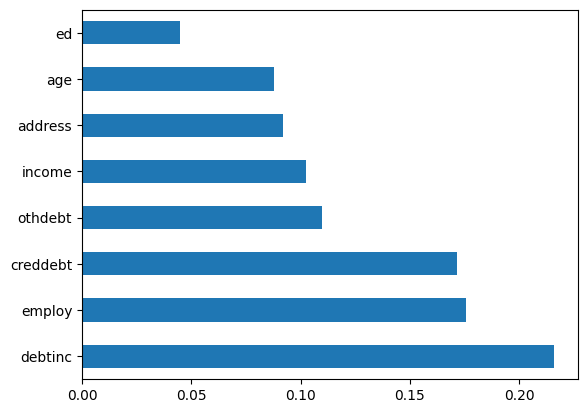

In [ ]:
#signifikan factor dari model tersebut yang menggambarkan nasabah gagal bayar/tidak
feat_importances = pd.Series(model_rf.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

##Pemodelan menggunakan XGBOOST Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#membuat object algoritma XGBOOST klasifikasi
clf_xg = XGBClassifier()
#memodelkan data menggunakan algortima decision tree
model_xg=clf_xg.fit(x_train, y_train)
#Melakukan prediksi pada data test
pred_xg=model_xg.predict(x_test)

##New Evaluasi Classification Report

In [ ]:
print(classification_report(y_test, pred_xg))

              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       155
         1.0       0.55      0.44      0.48        55

    accuracy                           0.76       210
   macro avg       0.68      0.65      0.66       210
weighted avg       0.74      0.76      0.75       210



Text(113.9222222222222, 0.5, 'predicted label')

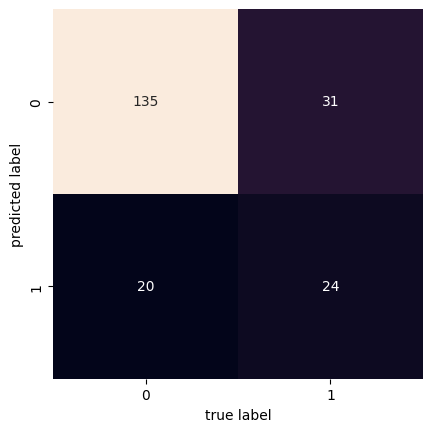

In [ ]:
# Visualize the confusion matrix of Random Forest
mat = confusion_matrix (y_test, pred_xg)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted label')

<Axes: >

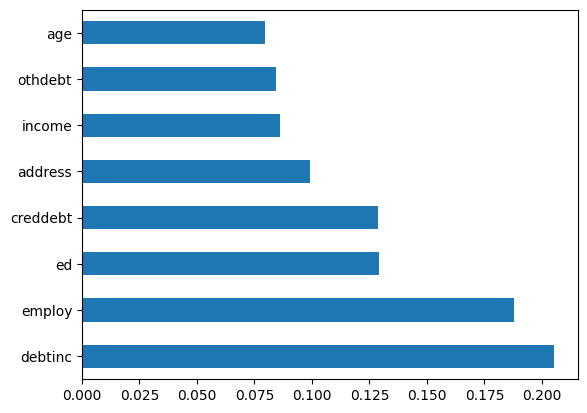

In [ ]:
#signifikan factor dari model tersebut yang menggambarkan nasabah gagal bayar/tidak
feat_importances = pd.Series(model_xg.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

## Pemodelan menggunakan logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#membuat object algoritma Logistik Regression
clf_lg=LogisticRegression()
#memodelkan data menggunakan algortima Logistik Regression
model_lg=clf_lg.fit(x_train, y_train)
#Melakukan prediksi pada data test
pred_lg=model_lg.predict(x_test)

In [ ]:
print(classification_report(y_test, pred_lg))

              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88       155
         1.0       0.73      0.40      0.52        55

    accuracy                           0.80       210
   macro avg       0.77      0.67      0.70       210
weighted avg       0.79      0.80      0.78       210



Text(113.9222222222222, 0.5, 'predicted label')

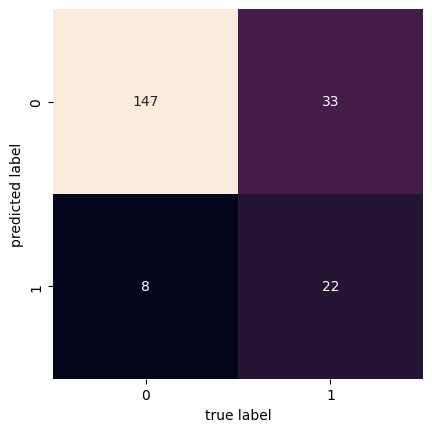

In [ ]:
# Visualize the confusion matrix of logistik regression
mat = confusion_matrix (y_test, pred_lg)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted label')

## pemodelan menggunakan SVM

In [ ]:
# import SVM
from sklearn.svm import SVC

In [ ]:
#membuat object algoritma Logistik SVM
clf_svm=SVC(kernel='linear', random_state=0)
#memodelkan data menggunakan algortima SVM
model_svm=clf_svm.fit(x_train, y_train)
#Melakukan prediksi pada data test
pred_svm=model_svm.predict(x_test)

In [ ]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88       155
         1.0       0.73      0.44      0.55        55

    accuracy                           0.81       210
   macro avg       0.78      0.69      0.71       210
weighted avg       0.80      0.81      0.79       210



Text(113.9222222222222, 0.5, 'predicted label')

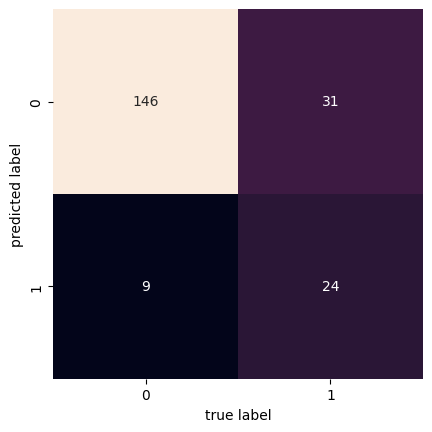

In [ ]:
# Visualize the confusion matrix of svm
mat = confusion_matrix (y_test, pred_svm)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted label')

## implementasi model

model terbaik yaitu menggunakan SVM dengan akurrasi 80% san presisi 82%

In [ ]:
#LOAD DATA nasabah baru/calon nasabah yg mengajukan kredit
path1='/content/drive/MyDrive/Colab Notebooks/DataSource/credit_risk_newCust.csv'
load_data1=pd.read_csv(path1, sep=',')

In [ ]:

#dataframe
df_newNasabah=pd.DataFrame(load_data1)
df_newNasabah.head()

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,700,36,1,16,13,32,10.9,0.544128,2.943872,NaN
1,701,50,1,6,27,21,12.9,1.316574,1.392426,NaN
2,702,40,1,9,9,33,17.0,4.880700,0.729300,NaN
3,703,31,1,5,7,23,2.0,0.046000,0.414000,NaN
4,704,29,1,4,0,24,7.8,0.866736,1.005264,NaN


In [ ]:
df_newNasabah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  150 non-null    int64  
 1   age         150 non-null    int64  
 2   ed          150 non-null    int64  
 3   employ      150 non-null    int64  
 4   address     150 non-null    int64  
 5   income      150 non-null    int64  
 6   debtinc     150 non-null    float64
 7   creddebt    150 non-null    float64
 8   othdebt     150 non-null    float64
 9   default     0 non-null      float64
dtypes: float64(4), int64(6)
memory usage: 11.8 KB


In [ ]:
#inpu variabel  untuk predict
x2=df_newNasabah[['age','ed','employ','address','income','debtinc','creddebt','othdebt']]

In [ ]:
#predict menggunnakan model svm
prediction_svm=model_svm.predict(x2)
prediction_svm

array([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

##Membuat object baru untuk preparing export hasil pemodelan data menggunakan data Baru

In [ ]:
df_pred=pd.DataFrame({'prediction': prediction_svm})
df_pred.head()

,prediction
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0


In [ ]:
df4=x2
df4

,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,36,1,16,13,32,10.9,0.544128,2.943872
1,50,1,6,27,21,12.9,1.316574,1.392426
2,40,1,9,9,33,17.0,4.880700,0.729300
3,31,1,5,7,23,2.0,0.046000,0.414000
4,29,1,4,0,24,7.8,0.866736,1.005264
...,...,...,...,...,...,...,...,...
145,34,1,12,15,32,2.7,0.239328,0.624672
146,32,2,12,11,116,5.7,4.026708,2.585292
147,48,1,13,11,38,10.8,0.722304,3.381696
148,35,2,1,11,24,7.8,0.417456,1.454544


In [ ]:
df_hasil_predict=pd.concat([df4,df_pred],sort=True, axis=1)
df_hasil_predict

,age,ed,employ,address,income,debtinc,creddebt,othdebt,prediction
0,36,1,16,13,32,10.9,0.544128,2.943872,0.0
1,50,1,6,27,21,12.9,1.316574,1.392426,0.0
2,40,1,9,9,33,17.0,4.880700,0.729300,1.0
3,31,1,5,7,23,2.0,0.046000,0.414000,0.0
4,29,1,4,0,24,7.8,0.866736,1.005264,0.0
...,...,...,...,...,...,...,...,...,...
145,34,1,12,15,32,2.7,0.239328,0.624672,0.0
146,32,2,12,11,116,5.7,4.026708,2.585292,0.0
147,48,1,13,11,38,10.8,0.722304,3.381696,0.0
148,35,2,1,11,24,7.8,0.417456,1.454544,0.0


In [ ]:
df_hasil_predict['prediction'].value_counts()

0.0    127
1.0     23
Name: prediction, dtype: int64

Dari hasil tersebut, maka Bank akan memutuskan ada sebanyak 127 calon yang diterima permohonan kreditnya, dan ada 23 nasabah yang ditolak permohonanannya

In [ ]:
#Eksport to CSV
#Eksport as downlod if in colab
from google.colab import files
#Menimpan File/Export File to Local computer output CSV file
df_hasil_predict.to_csv('df_hasil_predict.csv',sep=',')
files.download('df_hasil_predict.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Implemenatasi

In [ ]:
df.head()

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  700 non-null    int64  
 1   age         700 non-null    int64  
 2   ed          700 non-null    int64  
 3   employ      700 non-null    int64  
 4   address     700 non-null    int64  
 5   income      700 non-null    int64  
 6   debtinc     700 non-null    float64
 7   creddebt    700 non-null    float64
 8   othdebt     700 non-null    float64
 9   default     700 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 54.8 KB


#Nasabah Menunjukkan bahwa persentase rasio hutang terhadap kredit yang baik dibawah 30%
Kondisi kedua jika mau menaikkan limit kredit maka merefer nasabah yang belum pernah gagal bayar

In [ ]:
df_1 = df[(df['creddebt'] <= 0.3) & (df['default'] == 0)]

df_1.head()

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
7,7,43,1,12,11,38,3.6,0.128592,1.239408,0.0
10,10,27,1,0,1,16,1.7,0.182512,0.089488,0.0
11,11,25,1,4,0,23,5.2,0.252356,0.943644,0.0
19,19,41,3,0,21,26,1.7,0.099008,0.342992,0.0
29,29,26,3,2,1,37,14.2,0.204906,5.049094,0.0


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 7 to 693
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  115 non-null    int64  
 1   age         115 non-null    int64  
 2   ed          115 non-null    int64  
 3   employ      115 non-null    int64  
 4   address     115 non-null    int64  
 5   income      115 non-null    int64  
 6   debtinc     115 non-null    float64
 7   creddebt    115 non-null    float64
 8   othdebt     115 non-null    float64
 9   default     115 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 9.9 KB


dari hasil filter data, maka didapatkan ada 115 OLD Nasabah yang akan diberikan kenaikan limitasi kredit

Pada Case estimasi ini, biasanya terkait dengan analisis korelasi kita bisa menggunakan nilai korelasi untuk melihat hubungan linearitas, sehingga memutuskan variabel yang mana akan dijadikan signifikan factor (indikator pemodelan/input variabel)
Tetapi jika

<Axes: title={'center': 'Person Correlation'}>

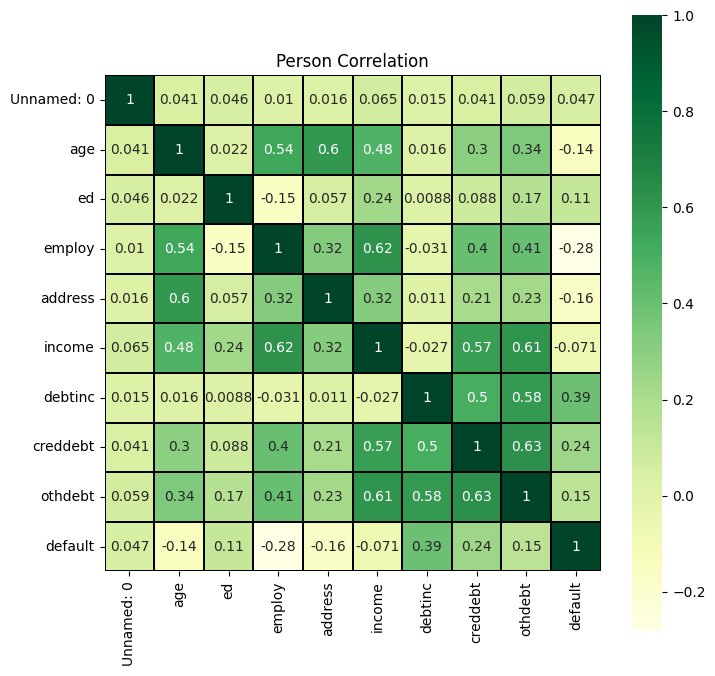

In [ ]:
f, ax=plt.subplots(figsize=(8,8))
plt.title('Person Correlation')
sns.heatmap(df.astype(float).corr(), linewidth=0.25, vmax=1.0, square=True, cmap='YlGn', linecolor='black', annot=True)

## Hasil Analisa

1. Ditemukan Multikolinearitas
2. Variabel independen memiliki hubungan yang kuat dengan variabel independen lainnya (anatar variabel indepen memiliki hubungan yang kuat)
3. Jika kodisi demikian, maka bisa disolusikan dengan algoritma multivariat: ANN, XGBoost
4. Hasil korelasi menunjukkan tidak ada linearitas dalam data terkait var independen dan dependen


## Pemodelan data

In [ ]:
#input variabel
x1=df_1[['age','ed','employ','address','income','creddebt','othdebt','default']]
#target var
y1=df_1['debtinc']

In [ ]:
#Split testing & training (supervised learning)
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.3, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
#Untuk evaluasi model
from sklearn import metrics

In [ ]:
ln=LinearRegression()

# training model

#memodelkan data menggunakan algortima linear regression
model_ln=ln.fit(x1_train, y1_train)
#Melakukan prediksi pada data test
pred_ln=model_ln.predict(x1_test)

In [ ]:
#Nilai R2

print('R Square:', metrics.r2_score(y1_test, pred_ln).round(3))

R Square: 0.716


In [ ]:
#Membuat Script MAPE
def mean_absolut_percentage_error(y1_true,y1_pred):
  y1_true,y1_pred=np.array(y1_true),np.array(y1_pred)
  return np.mean(np.abs(y1_true-y1_pred)/y1_true)*100

print('MAPE:', mean_absolut_percentage_error(y1_test,pred_ln).round(3))

MAPE: 25.797


## Pemodelan ANN

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

In [ ]:
mlp= MLPRegressor(hidden_layer_sizes=(100,100),activation='relu',max_iter=100)
#memodelkan data menggunakan algortima linear regression
model_mlp=mlp.fit(x1_train, y1_train)
#Melakukan prediksi pada data test
pred_mlp=model_mlp.predict(x1_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#Nilai R2

print('R Square:', metrics.r2_score(y1_test, pred_mlp).round(3))

R Square: 0.524


In [ ]:
#Membuat Script MAPE
def mean_absolut_percentage_error(y1_true,y1_pred):
  y1_true,y1_pred=np.array(y1_true),np.array(y1_pred)
  return np.mean(np.abs(y1_true-y1_pred)/y1_true)*100

print('MAPE:', mean_absolut_percentage_error(y1_test,pred_mlp))

MAPE: 42.75452084317675


## Pemodelan dengan XGBoost Classifier

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgr= XGBRegressor(n_estimators=200, max_depth=4, random_state=0,learning_rate=0.3)
#memodelkan data menggunakan algortima linear regression
model_xgr=xgr.fit(x1_train, y1_train)
#Melakukan pediksi pada data test
pred_xgr=model_xgr.predict(x1_test)

In [ ]:


print('R Square:', metrics.r2_score(y1_test, pred_xgr).round(3))

R Square: 0.82


In [ ]:
#Membuat Script MAPE
def mean_absolut_percentage_error(y1_true,y1_pred):
  y1_true,y1_pred=np.array(y1_true),np.array(y1_pred)
  return np.mean(np.abs(y1_true-y1_pred)/y1_true)*100

print('MAPE:', mean_absolut_percentage_error(y1_test,pred_xgr))

MAPE: 17.317448065401006


## Implementasi

In [ ]:
x2=df[['age','ed','employ','address','income','creddebt','othdebt','default']]

In [ ]:
prediction_xgr=model_xgr.predict(x2)
prediction_xgr

array([ 9.659283  ,  8.812883  ,  6.5088983 ,  2.2315233 ,  9.827171  ,
        9.329781  ,  9.714728  ,  3.5993629 , 12.006087  ,  6.660024  ,
        1.6999037 ,  4.9630885 ,  6.5349    , 10.770883  ,  9.180385  ,
        7.220538  ,  7.479186  ,  9.181802  ,  8.663825  ,  1.8565232 ,
        1.7516032 ,  5.731762  , 10.202906  , 10.393586  , 12.121328  ,
        7.068188  ,  7.142925  ,  9.181802  ,  9.701825  , 14.199729  ,
        2.100195  ,  5.653909  ,  3.4522934 , 10.412135  ,  4.308285  ,
       12.808355  ,  8.813278  ,  9.617382  , 12.409295  ,  3.9120464 ,
        8.415542  ,  7.3518744 ,  4.0408864 ,  9.666204  ,  5.0048485 ,
        6.345245  ,  4.0681143 , 10.859387  ,  6.5050564 ,  7.398811  ,
       11.2968235 , 10.580069  ,  7.119236  ,  3.887378  ,  9.27917   ,
        9.131239  ,  4.736396  ,  2.286218  ,  3.4641998 ,  9.190475  ,
        3.2046306 ,  3.743261  ,  9.3464985 ,  7.7120595 ,  4.849654  ,
        9.691546  ,  5.4468117 ,  3.8416054 ,  4.5720277 , 12.52

In [ ]:
df_prediction_xgr=pd.DataFrame({'Prediction':prediction_xgr}).round(2)

In [ ]:
df_pred_debtinc=pd.concat([df,df_prediction_xgr], sort=True, axis=1)

In [ ]:
df_approv=df_pred_debtinc[(df_pred_debtinc['creddebt']<=0.3)&(df_pred_debtinc['default']==0)]

In [ ]:
df_approv

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,Prediction
7,7,43,1,12,11,38,3.6,0.128592,1.239408,0.0,3.60
10,10,27,1,0,1,16,1.7,0.182512,0.089488,0.0,1.70
11,11,25,1,4,0,23,5.2,0.252356,0.943644,0.0,4.96
19,19,41,3,0,21,26,1.7,0.099008,0.342992,0.0,1.86
29,29,26,3,2,1,37,14.2,0.204906,5.049094,0.0,14.20
...,...,...,...,...,...,...,...,...,...,...,...
679,679,35,1,17,4,42,3.0,0.093240,1.166760,0.0,3.39
683,683,21,1,1,1,16,6.3,0.141120,0.866880,0.0,6.30
689,689,30,1,4,2,18,10.7,0.227268,1.698732,0.0,10.70
690,690,24,2,0,5,16,7.3,0.024528,1.143472,0.0,7.30


In [ ]:
from google.colab import files
#Menimpan File/Export File to Local computer output CSV file
df_approv.to_csv('df_approv.csv',sep=',')
files.download('df_approv.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>